## Preparação dos dados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch import optim

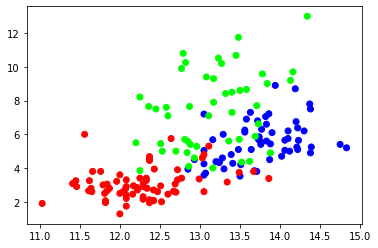

In [ ]:
wine = load_wine()

features = [0, 9]
data = wine.data[:, features]
targets = wine.target

plt.scatter(data[:, 0], data[:, 1], c=targets, cmap=plt.cm.brg)

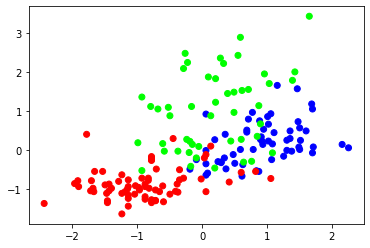

In [ ]:
# normalização dos dados

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=targets, cmap=plt.cm.brg)

In [ ]:
# Transformação dos dados em tensores
X = torch.FloatTensor(data)
X = X.to(device)

Y = torch.LongTensor(targets)
Y = Y.to(device)

# X -> Features
# Y -> Classes

## Setando o device

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

## Instanciando a Rede

In [ ]:
input_size = data.shape[1] ## Quantidade de features
hidden_size = 32
output_size = len(wine.target_names) ## Classes de vinhos

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Softmax()
)

net = net.to(device)

## Visualização da fronteira de decisão

In [ ]:
def plot_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
    spacing = min(x_max - x_min, y_max - y_min) / 100
    
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                            np.arange(y_min, y_max, spacing))
  
    data = np.hstack((XX.ravel().reshape(-1,1), 
                        YY.ravel().reshape(-1,1)))
    
    # For binary problems
    #db_prob = model(Variable(torch.Tensor(data)).cuda() )
    #clf = np.where(db_prob.cpu().data < 0.5,0,1)
    
    # For multi-class problems
    db_prob = model(torch.Tensor(data).to(device) )
    clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
    
    Z = clf.reshape(XX.shape)
    
    plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


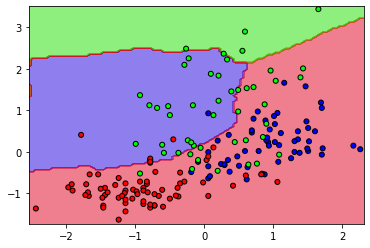

In [ ]:
plot_boundary(data, targets, net)

## Definição da função de perda e otimizador

In [ ]:
## Função de perda
## - Como é classificação, utilizaremos o CrossEntropyLoss
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

## Otimizador
## - Descida do Gradiente (Stochastic Gradient Descent)
optimizer = optim.SGD(net.parameters(), lr = 1e-3) ## lr -> Learn Rate

## Treinamento do modelo

Forward:
- Alimentar os dados na rede:

    `pred = net(X)`

- Calcular a função de perda:

    `loss = criterion(pred, Y)`

Backpropagation:
- Calcular o gradiente:

    `loss.backward()`

- Atualizar os pesos:

    `optimizer.step()`

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


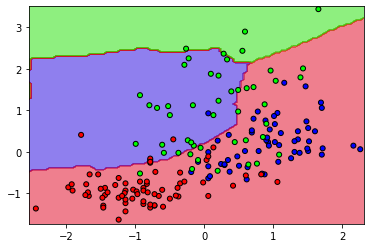

In [ ]:
# Forward
pred = net(X)
loss = criterion(pred, Y)

# Backpropagation
loss.backward()
optimizer.step()

plot_boundary(data, targets, net)

Após um passo de otimização, as fronteiras de decisão ainda estão identicas. Isso é por conta de que a otimização de uma rede neural é um processo iterativo, uma iteração apenas não irá otimizar os pesos.

## Loop de otimização

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


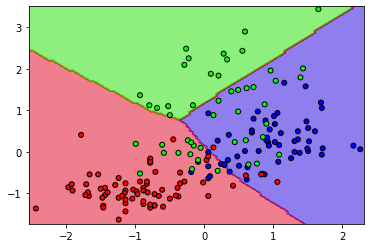

In [ ]:
for i in range(100): # 100 passos
    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backpropagation
    loss.backward()
    optimizer.step()

plot_boundary(data, targets, net)

Após 100 passos de otimização, a fronteira de decisão já parece bastante diferente da fronteira inicial aleatória. Vamos rodar mais 100 passos:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


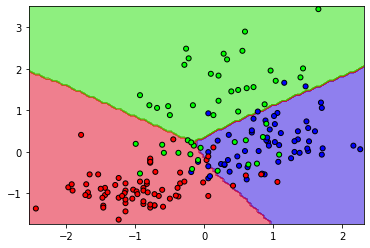

In [ ]:
for i in range(100): # 100 passos
    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backpropagation
    loss.backward()
    optimizer.step()

plot_boundary(data, targets, net)

Mais 1000 passos:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


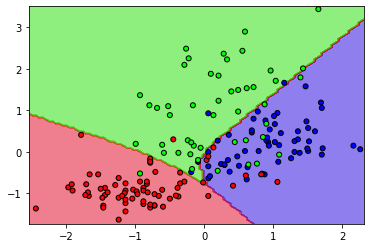

In [ ]:
for i in range(1000): # 1000 passos
    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backpropagation
    loss.backward()
    optimizer.step()

plot_boundary(data, targets, net)

Mais 10000 passos:

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


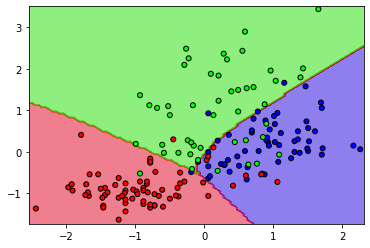

In [ ]:
for i in range(10000): # 10000 passos
    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backpropagation
    loss.backward()
    optimizer.step()

plot_boundary(data, targets, net)

De 1200 passos para 11200 passos, a fronteira de decisão mudou muito pouco, sofrendo ajustes finos.

# Otimizadores

### Descida do gradiente (SGD)

O algoritmo SGD para otimização é bastante suscetível a encontrar mínimos locais e fiacar preso neles, por conta da descida do gradiente. Para resolver isso, podemos adicionar momentum para caso encontre um mínimo local ele continue explorando até encontrar um mínimo global.

`optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9)`

A taxa de aprendizado (lr) varia de acordo com o problema e o dataset, porém o momentum usualmente é utilizado o valor 0.9, salvas exceções. Também é possível adicionar o hiperparâmetro Nesterov, que irá auxiliar na busca do mínimo global.

`optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9, nesterov = True)`

Além disso, é possível alterar o hiperparâmetro Weight Decay, na qual irá controlar a complexidade do modelo evitando o overfitting. Ele funciona penalizado pesos muito grandes, dessa forma a perda irá aumentar se os pesos crescerem muito. Quanto maior o valor, mais simples e genérico será o modelo.

`optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9, nesterov = True, weight_decay = 1e-4)` 

O algoritmo SGD utiliza a mesma taxa de aprendizado para todos os parâmetros. Com isso, surgiram algortimos que calculam a taxa de aprendizado para cada parâmetros individualmente, exemplos: 

- AdaGrad (Adaptative (Sub)Gradient): `optim.Adagrad(net.parameters(), lr = 1e-3, weight_decay = 5e-4)`

- AdaDelta: `optim.Adadelta(net.parameters(), lr = 1e-3, weight_decay = 5e-4)`
    - Soluciona alguns problemas de underfitting do adagrad.

- RMSprop: `optim.RMSprop(net.parameters(), lr = 1e-3, weight_decay = 5e-4, momentum = 0.9)`
    - Mais performatico que o AdaDelta.

- **Adam**: `optim.Adam(net.parameters(), lr = 1e-3, weight_decay = 5e-4)`
    - Algoritmo mais utilizado atualmente;
    - Existe momentum, porém dificilmente precisa ser alterado;
    - Só necessário mexer no lr e weight_decay, os demais hiperparâmetros já são otimizados para a maioria dos problemas.

